# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Upgrade pandas to use pandas.NA function
!pip install --upgrade pandas

^C


In [2]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
from tweepy import OAuthHandler, Cursor # for authentication and pagination
from timeit import default_timer as timer
import time

%matplotlib inline

Requirement already up-to-date: pandas in c:\users\arthur\anaconda3\lib\site-packages (1.4.2)


ModuleNotFoundError: No module named 'tweepy'

In [3]:
# read in the uploaded twitter-archive-enhanced.csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C192B93070>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [11]:
df_request = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
ht
# Twitter did not approve my Developer API request
# So I will be using the shortut as detailed in the project instructions 
# This means that I will be opying and pasting the code for twitter-api.py as provided
# This is Udacity supplied code; I have no input in generating it. I only read it to understand what it does

################## ----- Start of copied Udacity code ----- ######################
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values     # changed the value here to math the name of my dataframe
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

################## ----- End of copied Udacity code ----- ######################

# Note that running this cell prints out the errors for each iteration

NameError: name 'ht' is not defined

In [6]:
# read in the text file and build a dict for building a dataframe later
with open('tweet-json.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    count = 0
    data_list = []
    dict_list = []
    for line in lines:
        data_list.append(json.loads(line))    
        tweet_id = data_list[count]['id_str']
        retweet_count = data_list[count]['retweet_count']
        favorite_count = data_list[count]['favorite_count']
        dict_list.append({'tweet_id':tweet_id, 
                          'retweet_count':retweet_count, 
                          'favorite_count':favorite_count})
        count = count + 1
#     print(dict_list)
#     break

print(len(dict_list))
df_json = pd.DataFrame(dict_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

2354


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
830,768855141948723200,NaN,NaN,2016-08-25 16:58:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jesse. He really wants a belly rub. Wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768855141...,11,10,Jesse,None,None,None,None
771,776813020089548800,NaN,NaN,2016-09-16 16:00:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Solomon. He was arrested for possession o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776813020...,12,10,Solomon,None,None,None,None
414,822859134160621569,NaN,NaN,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,None,None
1702,680934982542561280,NaN,NaN,2015-12-27 02:15:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie. She's a Tortellini Sidewin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680934982...,10,10,Sadie,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo


In [8]:
# programmatically assess the data
print(df_archive.shape)
print(df_archive.info())

df_archive.describe()

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# checking if there are dupliated tweet data
display(df_archive[df_archive.tweet_id.duplicated()])
# removing the expanded url sine i dont knwn its value

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
df_request.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
# programmatically assess the data
print(df_request.shape)
print(df_request.info())

df_request.describe()

(2075, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
# checking if there are dupliated tweet data
display(df_request[df_request.tweet_id.duplicated()])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
# programmatically assess the data
print(df_json.shape)
print(df_json.info())

df_json.describe()

(2354, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB
None


,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [17]:
# checking if there are dupliated tweet data
display(df_json[df_json.tweet_id.duplicated()])

,tweet_id,retweet_count,favorite_count


In [18]:
df_archive[df_archive.tweet_id == 672108316018024452]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issues

Some observed quality issues in the dataset are listed below.

1. The columns `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` of the `df_archive` dataset have numeric datatype of instead of type `str` since they are not performing any numeric calculations. This issue is also observed in the `tweet_id` of the `df_request dataset`. The datatype of `timestamp` and `retweeted_status_timestamp` in the `df_archive` dataset are of type `string` instead of `datetime`. The dataype of the `rating_numerator` and `rating_denominator` features in the `df_archive` needs to be updated to type `float` to accommodate rating values that are deimal types.

2. Some dog ratings were not appropriately captured in the `rating_numerator` column since they are decimal types.

3. We are not interested in tweets that are retweets, but the `df_archive` dataset contains records that are retweets.

4. Some dog `name` is represented incorrectly with lowercase values such as the text 'a', 'an', 'very', 'quite' etc in the `df_archive` dataset.

5. Missing data in the `df_archive` dataset that are encoded as the text 'None'. This is shown in the `name`, `doggo`, `floofer`, `pupper`, and `puppo` columns especially.

6. The unique rating system suggests `rating_numerator` should be greater than the `rating_denominator`, however some records have `rating_numerator` less than the `rating_denominator` in `df_archive`. This unique rating system also suggests that the `rating_denominator` values in the `df_archive` dataset should be 10. However, some records have `rating_denominator` as less than 10 or greater than 10. Less than 10 are usually not ratings while more than 10 is usually a group of dogs. Some more than 10 are also errors.

7. The `expanded_urls` column has null values.

8. Some observations in `df_archive` have more than one URL in the `expanded_urls` column. Each tweet should have only one URL that points to it in the `expanded_urls` column.

### Tidiness issues
1. Last 4 features (`doggo`, `floofer`, `pupper`, and `puppo`) of the `df_archive` can be merged into a single feature.

2. The `df_json` and `df_request` datasets should be merged with the `df_archive` dataset with the `tweet_id` feature being the unique variable across datasets.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_request_copy = df_request.copy()
df_json_copy = df_json.copy()

In [24]:
# test if copies worked and are equal
assert df_archive.equals(df_archive_copy) and df_request.equals(df_request_copy) and df_json.equals(df_json_copy)

### Cleaning Quality Issues

### Issue #1:
#### Define:
The columns `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` of the `df_archive` dataset have numeric datatype of instead of type `str` since they are not performing any numeric calculations. This issue is also observed in the `tweet_id` of the `df_request dataset`. The datatype of `timestamp` and `retweeted_status_timestamp` in the `df_archive` dataset are of type `string` instead of `datetime`. The dataype of the `rating_numerator` and `rating_denominator` features in the `df_archive` needs to be updated to type `float` to accommodate rating values that are decimal types.

Update the datatypes of those  affected columns into the correct type.

#### Code

In [25]:
# Update the relevant columns to the correct string type in the df_archive
df_archive_copy = df_archive_copy.astype({'tweet_id':'string', 'in_reply_to_status_id':'string', 'in_reply_to_user_id':'string',
                                          'retweeted_status_id':'string', 'retweeted_status_user_id':'string'})

# Update the relevant columns to the correct numeric type in the df_archive
df_archive_copy = df_archive_copy.astype({'rating_numerator':'float', 'rating_denominator':'float'})

# Update the relevant columns to the correct date type in the df_archive
df_archive_copy = df_archive_copy.astype({'timestamp':'datetime64', 'retweeted_status_timestamp':'datetime64'})

# Update the relevant columns to the correct type in the df_request
df_request_copy = df_request_copy.astype({'tweet_id':'string'})

# Update the relevant columns to the correct type in the df_json
df_json_copy = df_json_copy.astype({'tweet_id':'string'})

# this is not required but for completness I want to do it
# Update the relevant columns to the correct string type in the df_archive
df_archive_copy = df_archive_copy.astype({'source':'string', 'text':'string', 'expanded_urls':'string', 'name':'string',
                                          'doggo':'string', 'floofer':'string', 'pupper':'string', 'puppo':'string'})

#### Test

In [26]:
(df_archive_copy.info())
display(df_archive_copy.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   string        
 1   in_reply_to_status_id       78 non-null     string        
 2   in_reply_to_user_id         78 non-null     string        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   string        
 5   text                        2356 non-null   string        
 6   retweeted_status_id         181 non-null    string        
 7   retweeted_status_user_id    181 non-null    string        
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   string        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
859,763183847194451968,<NA>,<NA>,2016-08-10 01:23:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/763183847...,8.0,10.0,Clark,None,None,None,None
25,887101392804085760,<NA>,<NA>,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/887101392...,12.0,10.0,None,None,None,None,None
200,854010172552949760,<NA>,<NA>,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/854010172...,11.0,10.0,None,doggo,floofer,None,None
1250,711008018775851008,<NA>,<NA>,2016-03-19 01:54:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/711008018...,11.0,10.0,Chuckles,None,None,pupper,None
1213,715220193576927233,<NA>,<NA>,2016-03-30 16:52:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Nico. His selfie game is strong af. Ex...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/715220193...,10.0,10.0,Nico,None,None,None,None


### Issue #2:
#### Define
Some dog ratings were not appropriately captured in the `rating_numerator` column since they are decimal types.

Update the `rating_numerator` feature to capture the correct value.

#### Code

In [27]:
# find the number of records where ratings were decimal values
df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

<ipython-input-27-0ad0b39d01fa>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [28]:
# since the records are small, I manually extracted the index and the true rating value via excel
# decimal_ratings = {44:13.5, 319:9.75, 659:9.75, 725:11.27, 1712:11.26}
df_archive_copy.at[45, 'rating_numerator'] = 13.5
df_archive_copy.at[340, 'rating_numerator'] = 9.75
df_archive_copy.at[695, 'rating_numerator'] = 9.75
df_archive_copy.at[763, 'rating_numerator'] = 11.27
df_archive_copy.at[1689, 'rating_numerator'] = 9.5
df_archive_copy.at[1712, 'rating_numerator'] = 11.26

#### Test

In [29]:
# find the number of records where ratings were decimal values
df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

<ipython-input-29-0ad0b39d01fa>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


### Issue #3:
#### Define

We are not interested in tweets that are retweets, but the `df_archive` dataset contains records that are retweets.

Drop the records of the dataset that are retweets. We identify retweets by the value of the `in_reply_to_user_id` and `in_reply_to_status_id,` being non nulls (or having a numeric value). I will also need to drop the columns, but it must be done after all records that are retweets are dropped.

#### Code

In [30]:
# drop records that are retweets
df_archive_copy = df_archive_copy[df_archive_copy.in_reply_to_user_id.isna()]

# drop the columns
df_archive_copy.drop(columns=['in_reply_to_user_id', 'in_reply_to_status_id'], axis=1, inplace=True)

# reset the index
df_archive_copy.reset_index(drop=True, inplace=True)

#### Test

In [32]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   string        
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   string        
 3   text                        2278 non-null   string        
 4   retweeted_status_id         181 non-null    string        
 5   retweeted_status_user_id    181 non-null    string        
 6   retweeted_status_timestamp  181 non-null    datetime64[ns]
 7   expanded_urls               2274 non-null   string        
 8   rating_numerator            2278 non-null   float64       
 9   rating_denominator          2278 non-null   float64       
 10  name                        2278 non-null   string        
 11  doggo                       2278 non-null   string      

### Issue #4:
#### Define

Some dog `name` is represented incorrectly with lowercase values such as the text 'a', 'an', 'very', 'quite' etc in the `df_archive` dataset.

Update the lowercase name texts in the `name` column to empty `string`

#### Code

In [33]:
# testing for the number of records having text 'None' before coding the changes
print(len(df_archive_copy[df_archive_copy.name != 'None']))
print(len(df_archive_copy[df_archive_copy.name == 'None']))
print(len(df_archive_copy[df_archive_copy.name != 'None']) + len(df_archive_copy[df_archive_copy.name == 'None']))
df_archive_copy.name[988].islower()

1610
668
2278


True

In [34]:
# use a for and an if statements to test the value in each name column cell
# then update all lowercase values to ''
for i in range(len(df_archive_copy)):
    if df_archive_copy.name[i].islower():
        df_archive_copy.name[i] = ''

#### Test

In [35]:
# testing for the number of records having text 'None' after coding the changes
print(len(df_archive_copy[df_archive_copy.name != 'None']))
print(len(df_archive_copy[df_archive_copy.name == 'None']))
print(len(df_archive_copy[df_archive_copy.name == '']))
print(len(df_archive_copy[df_archive_copy.name != 'None']) + len(df_archive_copy[df_archive_copy.name == 'None']))
df_archive_copy.name[988].islower()

1610
668
109
2278


False

In [36]:
df_archive_copy[df_archive_copy.name.str.islower()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:
#### Define

Missing data in the `df_archive` dataset that are encoded as the text 'None'. This is shown in the `name`, `doggo`, `floofer`, `pupper`, and `puppo` columns especially.

Update the text 'None' in these columns to an empty `string`.

#### Code

In [37]:
def update_value(my_df, col, find='None', value=''):
    '''
    A function to update column values if a condition is met 
    
    Arguments:
    my_df: the dataframe (required)
    col: the column to update (required)
    find: the value to find and replace (optional)
    value: the value to update previous column record with (optional)
    
    Returns:
    A dataframe column containing the updated values
    '''
    my_df.loc[my_df[col] == find, col] = value
    return my_df[col]

In [38]:
# update the columns to reflet the presence of null values
df_archive_copy.doggo = update_value(df_archive_copy, 'doggo')
df_archive_copy.floofer = update_value(df_archive_copy, 'floofer')
df_archive_copy.pupper = update_value(df_archive_copy, 'pupper')
df_archive_copy.puppo = update_value(df_archive_copy, 'puppo')
df_archive_copy.name = update_value(df_archive_copy, 'name')

#### Test

In [39]:
(df_archive_copy.info())
display(df_archive_copy.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   string        
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   string        
 3   text                        2278 non-null   string        
 4   retweeted_status_id         181 non-null    string        
 5   retweeted_status_user_id    181 non-null    string        
 6   retweeted_status_timestamp  181 non-null    datetime64[ns]
 7   expanded_urls               2274 non-null   string        
 8   rating_numerator            2278 non-null   float64       
 9   rating_denominator          2278 non-null   float64       
 10  name                        2278 non-null   string        
 11  doggo                       2278 non-null   string      

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2072,669923323644657664,2015-11-26 16:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/669923323...,10.0,10.0,,,,,
1129,721001180231503872,2016-04-15 15:44:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. Bath time is upon him. His fea...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/721001180...,11.0,10.0,Oliver,,,pupper,
798,768909767477751808,2016-08-25 20:35:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001437520531825e+17,4196983835.0,2016-02-18 02:24:13,https://twitter.com/dog_rates/status/700143752...,10.0,10.0,,,,pupper,
805,767884188863397888,2016-08-23 00:40:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Tito. He's on the lookout. Nobody know...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/767884188...,10.0,10.0,Tito,,,,
998,744995568523612160,2016-06-20 20:49:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/744995568...,9.0,10.0,Abby,,,,puppo


### Issue #6:
#### Define
The unique rating system suggests `rating_numerator` should be greater than the `rating_denominator`, however some records have `rating_numerator` less than the `rating_denominator` in `df_archive`. This unique rating system also suggests that the `rating_denominator` values in the `df_archive` dataset should be 10. However, some records have `rating_denominator` as less than 10 or greater than 10. Less than 10 are usually not ratings while more than 10 is usually a group of dogs. Some more than 10 are also errors.

Drop records with very low `rating_numerator`, this is because such records are usually not of dogs but sometimes just a pun by the @weRateDogs media team. We will also drop all records with `rating_denominator` not equal to 10.

#### Code

In [40]:
# testing for the number of records where rating_numerator is less than rating_denominator
len(df_archive_copy[df_archive_copy.rating_numerator < df_archive_copy.rating_denominator])

430

Wow! Dropping 430 records from a dataset that contains a total of 2278 records is not really wise. Dropping those records would mean that we have removed approximately 1/5 of our dataset. That is not acceptable.

We may need to take another approach and look at those records with very low values which are usually not tweets containing dog images and if they affect less than 5% of our dataset we can safely drop them.

In [41]:
len(df_archive_copy[df_archive_copy.rating_numerator < 4])

35

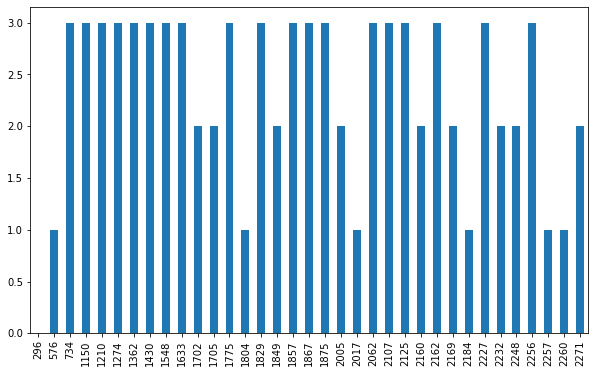

In [42]:
# plot the records that are rated lower than 4
df_archive_copy[df_archive_copy.rating_numerator < 4].rating_numerator.plot(kind='bar', figsize=(10,6));

Would be dropping records with a rating of less than 4

In [43]:
# find the number of records where rating_denominator != 10
len(df_archive_copy[df_archive_copy.rating_denominator != 10])

18

In [44]:
# drop records having rating_numerator < 4
df_archive_copy = df_archive_copy[df_archive_copy.rating_numerator >= 4]

# drop records having rating_denominator != 10
df_archive_copy = df_archive_copy[df_archive_copy.rating_denominator == 10]

# reset the index
df_archive_copy.reset_index(drop=True, inplace=True)

#### Test

In [45]:
display(df_archive_copy[df_archive_copy.rating_numerator < 4])
display(len(df_archive_copy[df_archive_copy.rating_denominator != 10]))
(df_archive_copy.info())

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2226 non-null   string        
 1   timestamp                   2226 non-null   datetime64[ns]
 2   source                      2226 non-null   string        
 3   text                        2226 non-null   string        
 4   retweeted_status_id         179 non-null    string        
 5   retweeted_status_user_id    179 non-null    string        
 6   retweeted_status_timestamp  179 non-null    datetime64[ns]
 7   expanded_urls               2222 non-null   string        
 8   rating_numerator            2226 non-null   float64       
 9   rating_denominator          2226 non-null   float64       
 10  name                        2226 non-null   string        
 11  doggo                       2226 non-null   string      

### Issue #7:
#### Define

The `expanded_urls` column has null values.

Drop null records  in `expanded_urls`.

#### Code

In [46]:
# find the number of records where expanded_urls is still null
(df_archive_copy[df_archive_copy.expanded_urls.isna()])

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
177,856330835276025856,2017-04-24 02:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563301587682181e+17,66699013.0,2017-04-24 02:13:14,<NA>,14.0,10.0,,,,,
353,828361771580813312,2017-02-05 21:56:51,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,<NA>,<NA>,NaT,<NA>,12.0,10.0,,,,,
672,785515384317313025,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",<NA>,<NA>,NaT,<NA>,10.0,10.0,,,,,
1381,696518437233913856,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,<NA>,<NA>,NaT,<NA>,10.0,10.0,,,,pupper,


In [47]:
# drop null records in expanded_urls
df_archive_copy.drop(labels=[177, 353, 672, 1381], inplace=True)
# [df_archive_copy.expanded_urls.index not in [177, 353, 672, 1376]]

# reset the index
df_archive_copy.reset_index(drop=True, inplace=True)

#### Test

In [48]:
display(df_archive_copy[df_archive_copy.expanded_urls.isna()])
(df_archive_copy.info())

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2222 non-null   string        
 1   timestamp                   2222 non-null   datetime64[ns]
 2   source                      2222 non-null   string        
 3   text                        2222 non-null   string        
 4   retweeted_status_id         178 non-null    string        
 5   retweeted_status_user_id    178 non-null    string        
 6   retweeted_status_timestamp  178 non-null    datetime64[ns]
 7   expanded_urls               2222 non-null   string        
 8   rating_numerator            2222 non-null   float64       
 9   rating_denominator          2222 non-null   float64       
 10  name                        2222 non-null   string        
 11  doggo                       2222 non-null   string      

### Issue #8:
#### Define
Some observations in `df_archive` have more than one URL in the `expanded_urls` column. Each tweet should have only one URL that points to it in the `expanded_urls` column.

Split the `expanded_urls` column by `,` and use the first url.

#### Code

In [49]:
# find the number of records where expanded_urls is multiple values
count = 0
for i in range(len(df_archive_copy.expanded_urls)):
    if len(df_archive_copy.expanded_urls.str.split(',')[i]) > 1:
        count += 1
print(count)

# this seems slow. Would be great if I can optimize it to be faster???

627


In [50]:
# use a for and an if statements to test the value in each expanded_urls column cell
# then select only the 2nd url; the 1st url in multi url columns are usually other sites
for i in range(len(df_archive_copy)):
    if len(df_archive_copy.expanded_urls.str.split(',')[i]) > 1:
        df_archive_copy.expanded_urls[i] = df_archive_copy.expanded_urls.str.split(',')[i][1]

#### Test

In [51]:
# find the number of records where expanded_urls is multiple values
count = 0
for i in range(len(df_archive_copy.expanded_urls)):
    if len(df_archive_copy.expanded_urls.str.split(',')[i]) > 1:
        count += 1
print(count)

0


In [52]:
df_archive_copy.expanded_urls[1211], df_archive_copy.expanded_urls[719]

('https://twitter.com/dog_rates/status/709556954897764353/photo/1',
 'https://twitter.com/dog_rates/status/778624900596654080/photo/1')

In [53]:
display(df_archive_copy.sample(5))

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
780,770414278348247044,2016-08-30 00:14:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/770414278...,11.0,10.0,Al,,,,
61,879862464715927552,2017-06-28 00:42:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/879862464...,13.0,10.0,Romeo,,,,
1284,704364645503647744,2016-02-29 17:56:32,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He's a Beneplop Cumbers...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/704364645...,12.0,10.0,Bisquick,,,,
762,772193107915964416,2016-09-03 22:02:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Willem. He's a Penn State pupper. Thin...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/772193107...,12.0,10.0,Willem,,,pupper,
1281,704761120771465216,2016-03-01 20:11:59,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/704761120...,13.0,10.0,,,,pupper,


### Cleaning Tidiness Issues

### Issue #1:
#### Define
Last 4 features (`doggo`, `floofer`, `pupper`, and `puppo`) of the `df_archive` can represent a single feature.

Merge the 4 columns into one new column and delete the old columns. Take care to appropriately handle the textual empty strings, which should be updated to `np.nan` or `pd.NA`

#### Code

In [54]:
# merge the columns for the dog stages into a new engineered column
df_archive_copy['dog_stage'] = df_archive_copy.doggo + df_archive_copy.floofer + df_archive_copy.pupper + df_archive_copy.puppo

# handling multiple stages
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'
df_archive_copy.loc[df_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'

# handling null entries dog stages and dog names
df_archive_copy.loc[df_archive_copy.dog_stage == '', 'dog_stage'] = pd.NA
df_archive_copy.loc[df_archive_copy.name == '', 'name'] = pd.NA
df_archive_copy.loc[df_archive_copy.name == 'None', 'name'] = pd.NA

# drop the parent columns
df_archive_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [55]:
df_archive_copy.loc[df_archive_copy.name == 'None']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Test

In [56]:
df_archive_copy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2222 non-null   string        
 1   timestamp                   2222 non-null   datetime64[ns]
 2   source                      2222 non-null   string        
 3   text                        2222 non-null   string        
 4   retweeted_status_id         178 non-null    string        
 5   retweeted_status_user_id    178 non-null    string        
 6   retweeted_status_timestamp  178 non-null    datetime64[ns]
 7   expanded_urls               2222 non-null   string        
 8   rating_numerator            2222 non-null   float64       
 9   rating_denominator          2222 non-null   float64       
 10  name                        1485 non-null   string        
 11  dog_stage                   370 non-null    string      

### Issue #2:
#### Define
The `df_json` and `df_request` datasets should be merged with the `df_archive` dataset with the `tweet_id` feature being the unique variable across datasets.

Merge the cleaned `df_json`, `df_request` and `df_archive` datasets.

#### Code

In [57]:
df_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   string
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 55.3 KB


In [58]:
# merge the df_archive_copy and df_json_copy datasets
df_archive_copy = df_archive_copy.merge(df_json_copy, on='tweet_id')

In [59]:
# record of dog predictions that were never classified as dogs
df_request_copy.loc[(df_request_copy['p1_dog'] == False) & (df_request_copy['p2_dog'] == False) & 
                    (df_request_copy['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


From the above we have 324 rows in the data that were not classified into any valid dog breed group. I will be dropping those records simply because I want to ask a specific question of my data: namely; _*what is the most tweeted dog breed in the combined datasets?*_

In [60]:
# create a dog_breed engineered feature
d_breed = []
for i in range(len(df_request_copy)):
    if df_request_copy.p1_dog[i] == True:
        d_breed.append(df_request_copy.p1[i])
    elif df_request_copy.p2_dog[i] == True:
        d_breed.append(df_request_copy.p2[i])
    elif df_request_copy.p3_dog[i] == True:
        d_breed.append(df_request_copy.p3[i]) 
    else:
        d_breed.append(pd.NA)

# create the engineered column
df_request_copy['dog_breed'] = d_breed

In [61]:
# clean the df_requests_copy dataset
# drop unnecessary columns
df_request_copy.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
                              'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

# remove '_' in dog_breed names
df_request_copy.dog_breed = df_request_copy.dog_breed.str.replace('_', ' ')

# capitalize each word in dog_breed names
df_request_copy.dog_breed = df_request_copy.dog_breed.str.title()

# since only the dog_breed column contains nulls, I drop such null values
df_request_copy.dropna(inplace=True)

# reset the index
df_request_copy.reset_index(drop=True, inplace=True)

In [62]:
# merge the datasets
df_archive_copy = df_archive_copy.merge(df_request_copy, on='tweet_id')

#### Test

In [63]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 0 to 1705
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1706 non-null   string        
 1   timestamp                   1706 non-null   datetime64[ns]
 2   source                      1706 non-null   string        
 3   text                        1706 non-null   string        
 4   retweeted_status_id         64 non-null     string        
 5   retweeted_status_user_id    64 non-null     string        
 6   retweeted_status_timestamp  64 non-null     datetime64[ns]
 7   expanded_urls               1706 non-null   string        
 8   rating_numerator            1706 non-null   float64       
 9   rating_denominator          1706 non-null   float64       
 10  name                        1221 non-null   string        
 11  dog_stage                   267 non-null    string      

In [64]:
# I will further drop columns that contain null data and for which I cannot get the lost values back 
df_archive_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'name', 
                              'dog_stage'], axis=1, inplace=True)
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706 entries, 0 to 1705
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1706 non-null   string        
 1   timestamp           1706 non-null   datetime64[ns]
 2   source              1706 non-null   string        
 3   text                1706 non-null   string        
 4   expanded_urls       1706 non-null   string        
 5   rating_numerator    1706 non-null   float64       
 6   rating_denominator  1706 non-null   float64       
 7   retweet_count       1706 non-null   int64         
 8   favorite_count      1706 non-null   int64         
 9   jpg_url             1706 non-null   object        
 10  dog_breed           1706 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2), string(4)
memory usage: 159.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
# save the cleaned datasets
df_archive_copy.to_csv('twitter_archive_master.csv', index=False)